In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os #importing operating system so the file in the system can be used

import warnings

warnings.filterwarnings("ignore")
from subprocess import check_output


# Using os.path.expanduser to get the full home directory path
home_directory = os.path.expanduser("~")
file_path = os.path.join(home_directory, "data", "column_2C_weka.csv") #importing the dataset from operating system

# Read the CSV file
data = pd.read_csv(file_path)
print(plt.style.available) # look at available plot styles
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


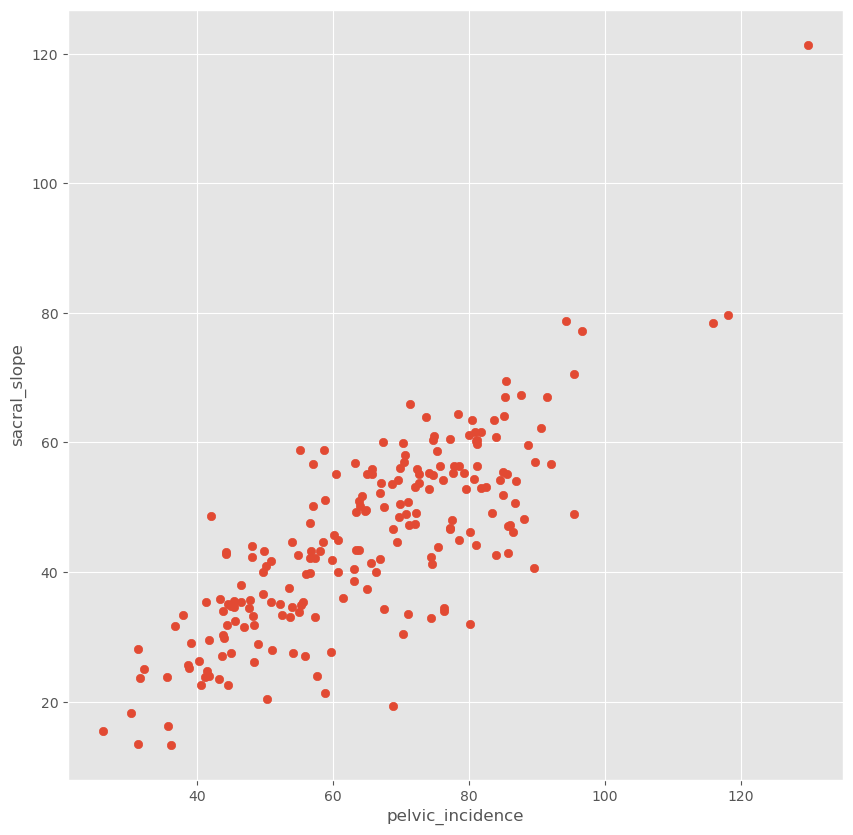

In [2]:
# create data1 that includes pelvic_incidence that is feature and sacral_slope that is target variable
data1 = data[data['class'] =='Abnormal']
x = np.array(data1.loc[:,'pelvic_incidence']).reshape(-1,1)
y = np.array(data1.loc[:,'sacral_slope']).reshape(-1,1)
# Scatter
plt.figure(figsize=[10,10])
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

R^2 score:  0.6458410481075871


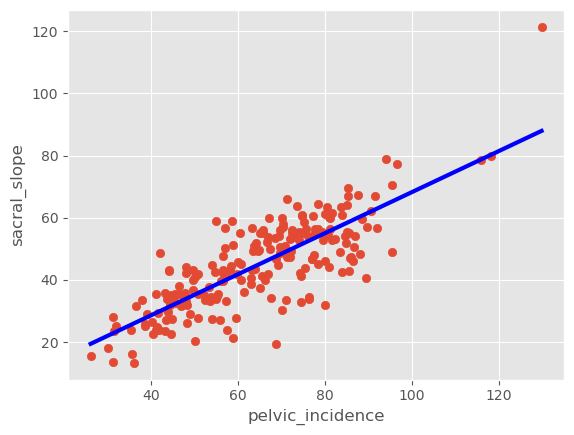

In [4]:
# LinearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
# Predict space
predict_space = np.linspace(min(x), max(x)).reshape(-1,1)
# Fit
reg.fit(x,y)
# Predict
predicted = reg.predict(predict_space)
# R^2 
print('R^2 score: ',reg.score(x, y))
# Plot regression line and scatter
plt.plot(predict_space, predicted, color='blue', linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.show()

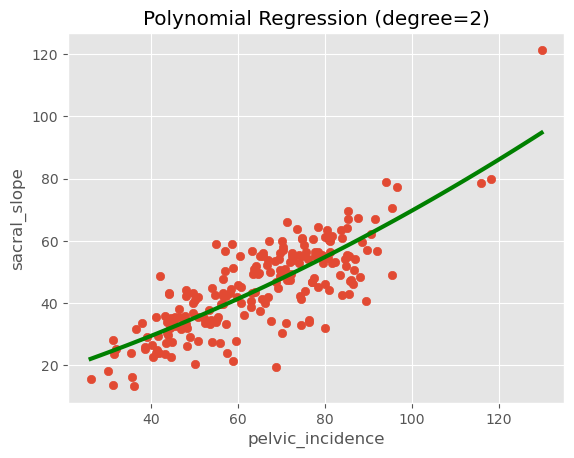

R^2 score (polynomial regression):  0.6492426719559785


In [7]:
# Additional imports
from sklearn.preprocessing import PolynomialFeatures

# Polynomial Regression
degree = 2  # You can change the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)

# Transform the feature
x_poly = poly_features.fit_transform(x)

# Polynomial Regression
reg_poly = LinearRegression()
reg_poly.fit(x_poly, y)

# Predict space for the polynomial curve
predict_space_poly = poly_features.transform(predict_space)

# Predict
predicted_poly = reg_poly.predict(predict_space_poly)

# Plot the polynomial regression line
plt.plot(predict_space, predicted_poly, color='green', linewidth=3)
plt.scatter(x=x, y=y)
plt.xlabel('pelvic_incidence')
plt.ylabel('sacral_slope')
plt.title('Polynomial Regression (degree=' + str(degree) + ')')
plt.show()

# R^2 score for polynomial regression
print('R^2 score (polynomial regression): ', reg_poly.score(x_poly, y))


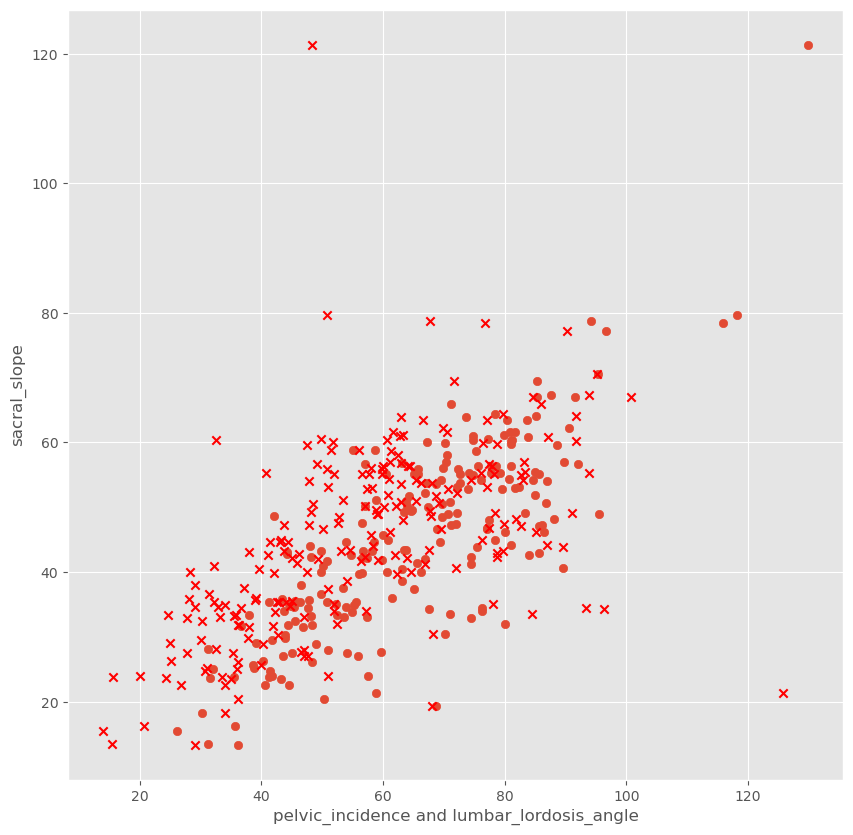

R^2 score (multiple linear regression):  0.6458831871498875


In [9]:
# Additional imports
from sklearn.linear_model import LinearRegression

# Adding 'lumbar_lordosis_angle' as an additional feature
data1 = data[data['class'] == 'Abnormal']
x_multi = np.array(data1.loc[:, ['pelvic_incidence', 'lumbar_lordosis_angle']])
y_multi = np.array(data1.loc[:, 'sacral_slope']).reshape(-1, 1)

# Multiple Linear Regression
reg_multi = LinearRegression()
reg_multi.fit(x_multi, y_multi)

# Scatter plot
plt.figure(figsize=[10, 10])
plt.scatter(x=x_multi[:, 0], y=y_multi)
plt.scatter(x=x_multi[:, 1], y=y_multi, color='red', marker='x')  # Adding lumbar_lordosis_angle in red
plt.xlabel('pelvic_incidence and lumbar_lordosis_angle')
plt.ylabel('sacral_slope')
plt.show()

# R^2 score for multiple linear regression
print('R^2 score (multiple linear regression): ', reg_multi.score(x_multi, y_multi))
